In [4]:
!pip install git+https://github.com/openai/whisper.git --use-deprecated=legacy-resolver

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/openai/whisper.git to c:\users\sarve\appdata\local\temp\pip-req-build-h16fz4a4
  Resolved https://github.com/openai/whisper.git to commit 25639fc17ddc013d56c594bfbf7644f2185fad84
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=812666 sha256=a6e5c8188758213db70ea8ad417e6accfe01c45cab9225fb3edd6c75ecc52e11
  Stored in directory: C:\Users\sarve\AppData\Local\Temp\pip-ephem-wheel-cache-yd2d5sir\wheels\c3\03\25\5e0ba78bc27a3a089f137c9f1d92fdfce16d06996c071a016c
Successfully built openai-whisper


  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git 'C:\Users\sarve\AppData\Local\Temp\pip-req-build-h16fz4a4'


In [5]:
!pip install -U openai-whisper

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import whisper
model = whisper.load_model("base")
result = model.transcribe(r"C:\Users\sarve\Downloads\Recording.mp3")
print(result["text"])


100%|███████████████████████████████████████| 139M/139M [00:19<00:00, 7.58MiB/s]
C:\Users\sarve\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisper\__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for

 Hello everyone, welcome to the project.


In [2]:
import sys
print(sys.executable)
!{sys.executable} -m pip install sounddevice
!pip show sounddevice


C:\Users\sarve\AppData\Local\Programs\Python\Python311\python.exe
Name: sounddevice
Version: 0.5.0
Summary: Play and Record Sound with Python
Home-page: http://python-sounddevice.readthedocs.io/
Author: Matthias Geier
Author-email: Matthias.Geier@gmail.com
License: MIT
Location: C:\Users\sarve\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: CFFI
Required-by: 


In [4]:
import sounddevice as sd
import numpy as np
import queue
import threading
import torch
import whisper
import time

model = whisper.load_model("base")
audio_queue = queue.Queue()

def record_audio(duration=5, sample_rate=16000):
    print("Recording...")
    audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
    sd.wait()  
    audio_queue.put(audio.flatten())  
    print("Recording finished.")

def transcribe_audio():
    while True:
        if not audio_queue.empty():
            audio_data = audio_queue.get()
            audio_tensor = torch.from_numpy(audio_data).float()
            audio_tensor = audio_tensor / torch.max(torch.abs(audio_tensor))
            result = model.transcribe(audio_tensor.numpy(), language='en')
            print("Transcription:")
            print(result['text'])

transcription_thread = threading.Thread(target=transcribe_audio)
transcription_thread.daemon = True
transcription_thread.start()

def start_recording(total_duration=30, interval=5):
    start_time = time.time()
    try:
        while (time.time() - start_time) < total_duration:
            record_audio(duration=interval)
    except KeyboardInterrupt:
        print("Recording interrupted. Exiting...")

start_recording(total_duration=30, interval=5)



Recording...
Recording finished.
Recording...
Transcription:
 Yeah?
Recording finished.
Recording...
Transcription:
 okay like what do we have to do like
Recording finished.
Recording...
Transcription:
 It is very... I don't know what we have to... Hello...
Recording finished.
Recording...
Transcription:
 I am service, I am service, I am service.
Recording finished.
Recording...
Transcription:
 Okay,
Recording finished.
Transcription:
 Bye bye.


In [1]:
import sys
!{sys.executable} -m pip install lyricsgenius
import whisper
import lyricsgenius
model = whisper.load_model("base")
result = model.transcribe(r"C:\Users\sarve\Downloads\Shape of You.mp3")
lyrics = result["text"]
print("Transcribed Lyrics:", lyrics)
genius = lyricsgenius.Genius("xLe0xGDFWC73A2zvQlLbbeeaASGNYTD8aU2uilUuxYg9q_dxUttzuEEAatQlw7eZ")
first_line = lyrics.split("\n")[0]
song = genius.search_song(first_line)
if song:
    print(f"Song Name: {song.title}")
    print(f"Artist: {song.artist}")
else:
    print("Song could not be identified.")


C:\Users\sarve\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisper\__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, m

Transcribed Lyrics:  The club is in the best place to find the lovers at the bar is where I go Me and my friends at the table doing shots through the bars to make it talk slow Come over and start a conversation with just me and trust me I'll give it a chance Now it's my hand stop a pen the man on the jukebox and then we start to dance And I'm singing like a girl you know I want your love Your love was handmade for somebody like me Coming out for my lead or maybe crazy don't mind me say boy Let's not talk too much grab all my waist and put that body on me Coming out for my lead, coming out for my lead I'm in love with the shape of you, we push and pull like a magnet Although my heart is falling too, I'm in love with your body And last night you were in my room and now my bed she smelled like you Where we'd be discovered in something brand new I'm in love with your body Oh, I'm in love with your body Oh, I'm in love with your body Oh, I'm in love with your body Where we'd be discovered i

In [ ]:
#Side project
import sys
!{sys.executable} -m pip install lyricsgenius
!{sys.executable} -m pip install lyricsgenius requests
import whisper
import lyricsgenius
model = whisper.load_model("base")
result = model.transcribe(r"C:\Users\sarve\Downloads\Shape of You.mp3")
lyrics = result["text"]
print("Transcribed Lyrics:", lyrics)
genius = lyricsgenius.Genius("xLe0xGDFWC73A2zvQlLbbeeaASGNYTD8aU2uilUuxYg9q_dxUttzuEEAatQlw7eZ")
first_line = lyrics.split("\n")[0]
song = genius.search_song(first_line)
if song:
    print(f"Song Name: {song.title}")
    print(f"Artist: {song.artist}")
else:
    print("Song could not be identified.")


In [2]:
#Side project
import sys
import requests
from bs4 import BeautifulSoup
import whisper
!{sys.executable} -m pip install beautifulsoup4 requests
model = whisper.load_model("base")
result = model.transcribe(r"C:\Users\sarve\Downloads\Shape of You.mp3")
lyrics = result["text"]
print("Transcribed Lyrics:", lyrics)
def search_google_for_song(lyrics):
    query = f"{lyrics.strip()} song"
    url = f"https://www.google.com/search?q={query}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an error for bad responses
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error during requests to Google: {e}")
        return ""
html = search_google_for_song(lyrics)
soup = BeautifulSoup(html, "html.parser")
result_block = soup.find_all('div', class_='BNeawe iBp4i AP7Wnd')

if result_block:
    for result in result_block:
        print(result.get_text())
else:
    print("Song not found.")


Transcribed Lyrics:  The club is in the best place to find the lovers at the bar is where I go Me and my friends at the table doing shots through the bars to make it talk slow Come over and start a conversation with just me and trust me I'll give it a chance Now it's my hand stop a pen the man on the jukebox and then we start to dance And I'm singing like a girl you know I want your love Your love was handmade for somebody like me Coming out for my lead or maybe crazy don't mind me say boy Let's not talk too much grab all my waist and put that body on me Coming out for my lead, coming out for my lead I'm in love with the shape of you, we push and pull like a magnet Although my heart is falling too, I'm in love with your body And last night you were in my room and now my bed she smelled like you Where we'd be discovered in something brand new I'm in love with your body Oh, I'm in love with your body Oh, I'm in love with your body Oh, I'm in love with your body Where we'd be discovered i

In [5]:
import sys
!{sys.executable} -m pip install jiwer
import whisper
from difflib import SequenceMatcher
from jiwer import wer
model = whisper.load_model("medium")
transcribed_text = model.transcribe(r"C:\Users\sarve\Downloads\Combined.mp3")["text"]
print("Transcribed Text:", transcribed_text)
reference_texts = [
    "Bonjour et bienvenue parmi nous. Hello everyone, welcome to the",
    "Bonjour et bienvenue parmi nous. Hello everyone, welcome to the project.",
]
total_wer = 0
total_count = len(reference_texts)
for ref_text in reference_texts:
    similarity = SequenceMatcher(None, ref_text, transcribed_text).ratio()
    error_rate = wer(ref_text, transcribed_text)
    total_wer += error_rate   
    print(f"Reference Text: {ref_text}")
    print(f"Similarity Ratio: {similarity:.2f}, WER: {error_rate:.2f}")
    print("Match!" if similarity > 0.8 else "No Match!")
    print()
average_wer = total_wer / total_count
accuracy = 1 - average_wer
print(f"Average WER: {average_wer:.2f}")
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Transcribed Text:  Bonjour et bienvenue parmi nous. Hello everyone, welcome to the project.
Reference Text: Bonjour et bienvenue parmi nous. Hello everyone, welcome to the
Similarity Ratio: 0.93, WER: 0.10
Match!

Reference Text: Bonjour et bienvenue parmi nous. Hello everyone, welcome to the project.
Similarity Ratio: 0.99, WER: 0.00
Match!

Average WER: 0.05
Model Accuracy: 95.00%


In [4]:
#extra work
import sounddevice as sd
import numpy as np
import queue
import threading
import torch
import whisper
from jiwer import wer 
model = whisper.load_model("base")
audio_queue = queue.Queue()
def record_audio(duration=5, sample_rate=16000):
    print("Recording...")
    audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
    sd.wait()  
    audio_queue.put(audio.flatten())  
    print("Recording finished.")
def transcribe_audio():
    while True:
        if not audio_queue.empty():
            audio_data = audio_queue.get()
            audio_tensor = torch.from_numpy(audio_data).float()
            audio_tensor = audio_tensor / torch.max(torch.abs(audio_tensor))
            result = model.transcribe(audio_tensor.numpy(), language='en')
            transcription_text = result['text']
            print("Transcription:")
            print(transcription_text)
            reference_text = "Hello everyone, welcome to the project."
            error_rate = wer(reference_text, transcription_text)
            print(f"Word Error Rate: {error_rate:.2f}")
transcription_thread = threading.Thread(target=transcribe_audio)
transcription_thread.daemon = True
transcription_thread.start()
def start_recording():
    try:
        while True:
            record_audio(duration=5)
    except KeyboardInterrupt:
        print("Recording interrupted. Exiting...")


C:\Users\sarve\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisper\__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, m

In [ ]:
start_recording()

In [ ]:
#model-fine tuning
import os
import pandas as pd
csv_path = r'C:\Users\sarve\Downloads\sample_dataset\filtered_csv_file.csv'
audio_folder_path = r'C:\Users\sarve\Downloads\sample_dataset\train'
df = pd.read_csv(csv_path)
df['file_name'] = df['file_name'].apply(lambda x: os.path.abspath(os.path.join(audio_folder_path, os.path.basename(x))))
df.to_csv(csv_path, index=False)

In [2]:
import sys
!{sys.executable} -m pip install datasets
!{sys.executable} -m pip install transformers
!{sys.executable} -m pip install librosa
!{sys.executable} -m pip install soundfile
!{sys.executable} -m pip install transformers[torch]
from datasets import load_dataset, Audio
dataset = load_dataset('csv', data_files=r'C:\Users\sarve\Downloads\sample_dataset\filtered_csv_file.csv')
dataset = dataset.cast_column('file_name', Audio(sampling_rate=16000))
dataset = dataset.rename_column('file_name', 'audio')
dataset = dataset.rename_column('phrase', 'sentence')
print(dataset)
from transformers import WhisperProcessor
from datasets import load_dataset
processor = WhisperProcessor.from_pretrained("openai/whisper-base")
def prepare_dataset(batch):
    batch["input_features"] = processor(batch["audio"]["array"], sampling_rate=16000).input_features[0]
    batch["labels"] = processor.tokenizer(batch["sentence"]).input_ids
    return batch
columns_to_remove = [
    'audio_clipping', 
    'audio_clipping:confidence', 
    'background_noise_audible',
    'background_noise_audible:confidence', 
    'overall_quality_of_the_audio',
    'quiet_speaker', 
    'quiet_speaker:confidence', 
    'speaker_id',
    'file_download', 
    'prompt', 
    'writer_id'
]
dataset = dataset.map(prepare_dataset, remove_columns=columns_to_remove)
print(dataset)


C:\Users\sarve\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 46 examples [00:00, 3285.06 examples/s]


DatasetDict({
    train: Dataset({
        features: ['audio_clipping', 'audio_clipping:confidence', 'background_noise_audible', 'background_noise_audible:confidence', 'overall_quality_of_the_audio', 'quiet_speaker', 'quiet_speaker:confidence', 'speaker_id', 'file_download', 'audio', 'sentence', 'prompt', 'writer_id'],
        num_rows: 46
    })
})


Map: 100%|██████████████████████████████████████████████████████████████████████| 46/46 [00:07<00:00,  6.02 examples/s]

DatasetDict({
    train: Dataset({
        features: ['audio', 'sentence', 'input_features', 'labels'],
        num_rows: 46
    })
})


In [3]:
import sys
!{sys.executable} -m pip install "accelerate>=0.26.0"
!{sys.executable} -m pip install "transformers[torch]"
import accelerate
import transformers
import torch
from transformers import WhisperForConditionalGeneration, Seq2SeqTrainingArguments, Seq2SeqTrainer
from torch.nn.utils.rnn import pad_sequence
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-base")

training_args = Seq2SeqTrainingArguments(
    output_dir="whisper-finetuned",
    per_device_train_batch_size=8,
    gradient_accumulation_steps=4,
    learning_rate=1e-5,
    num_train_epochs=3,
    fp16=False,
    save_steps=100,
    logging_steps=10,
    evaluation_strategy="steps",
    eval_steps=100,
    save_total_limit=2,
)

class DataCollatorForWhisper:
    def __call__(self, features):
        
        input_features = [torch.tensor(feature["input_features"]) for feature in features]
        labels = [torch.tensor(feature["labels"]) for feature in features]

        
        input_features_padded = pad_sequence(input_features, batch_first=True, padding_value=0)
        labels_padded = pad_sequence(labels, batch_first=True, padding_value=-100)

        return {
            "input_features": input_features_padded,
            "labels": labels_padded
        }
data_collator = DataCollatorForWhisper()

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset['train'],
    tokenizer=processor.tokenizer,  
    data_collator=data_collator,
)
trainer.train()
model.save_pretrained("whisper-finetuned")
processor.save_pretrained("whisper-finetuned")

C:\Users\sarve\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss,Validation Loss


C:\Users\sarve\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\modeling_utils.py:2618: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50358, 50359, 50360, 50361, 50362], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


[]

Files already downloaded and verified
Epoch [1/5], Loss: 0.0565
Epoch [2/5], Loss: 0.0707
Epoch [3/5], Loss: 0.0504
Epoch [4/5], Loss: 0.0569
Epoch [5/5], Loss: 0.0520


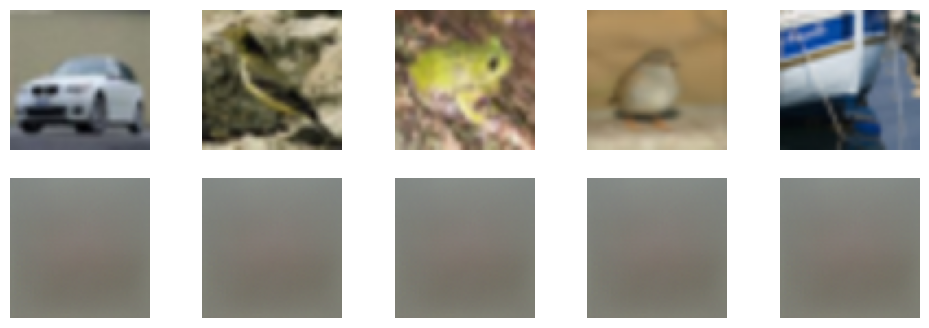

In [1]:
#VQ model
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define Encoder
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1)

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.ReLU()(self.conv2(x))
        x = nn.ReLU()(self.conv3(x))
        return x

# Define Decoder
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.deconv1 = nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1)
        self.deconv2 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.deconv3 = nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1)

    def forward(self, x):
        x = nn.ReLU()(self.deconv1(x))
        x = nn.ReLU()(self.deconv2(x))
        x = torch.sigmoid(self.deconv3(x))
        return x

# Vector Quantizer
class VectorQuantizer(nn.Module):
    def __init__(self, num_embeddings, embedding_dim):
        super(VectorQuantizer, self).__init__()
        self.embedding = nn.Embedding(num_embeddings, embedding_dim)

    def forward(self, z):
        z_flattened = z.view(-1, z.size(1))
        distances = torch.cdist(z_flattened.unsqueeze(0), self.embedding.weight.unsqueeze(0))
        encoding_indices = torch.argmin(distances, dim=2).view(z.size(0), -1)
        quantized = self.embedding(encoding_indices).view(z.size())
        return quantized, encoding_indices

# Define VQ-GAN
class VQGAN(nn.Module):
    def __init__(self, num_embeddings, embedding_dim):
        super(VQGAN, self).__init__()
        self.encoder = Encoder()
        self.quantizer = VectorQuantizer(num_embeddings, embedding_dim)
        self.decoder = Decoder()

    def forward(self, x):
        z = self.encoder(x)
        quantized, _ = self.quantizer(z)
        reconstructed = self.decoder(quantized)
        return reconstructed

# Instantiate models and define loss and optimizer
num_embeddings = 512
embedding_dim = 256
vqgan = VQGAN(num_embeddings, embedding_dim)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(list(vqgan.parameters()), lr=0.0002)

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

num_epochs = 5

for epoch in range(num_epochs):
    for images, _ in dataloader:
        optimizer.zero_grad()
        
        reconstructed_images = vqgan(images)
        loss = criterion(reconstructed_images, images)
        
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Visualization
with torch.no_grad():
    sample_images = next(iter(dataloader))[0]
    reconstructed_images = vqgan(sample_images)

def show_images(original, reconstructed):
    fig, axes = plt.subplots(2, len(original), figsize=(12, 4))
    for i in range(len(original)):
        axes[0][i].imshow(original[i].permute(1, 2, 0).numpy())
        axes[0][i].axis('off')
        
        axes[1][i].imshow(reconstructed[i].permute(1, 2, 0).numpy())
        axes[1][i].axis('off')
    
    plt.show()

show_images(sample_images[:5], reconstructed_images[:5])


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1)

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.ReLU()(self.conv2(x))
        x = nn.ReLU()(self.conv3(x))
        return x

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.deconv1 = nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1)
        self.deconv2 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.deconv3 = nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1)

    def forward(self, x):
        x = nn.ReLU()(self.deconv1(x))
        x = nn.ReLU()(self.deconv2(x))
        x = torch.sigmoid(self.deconv3(x))  # Sigmoid to ensure output is in [0, 1]
        return x
class VectorQuantizer(nn.Module):
    def __init__(self, num_embeddings, embedding_dim):
        super(VectorQuantizer, self).__init__()
        self.embedding = nn.Embedding(num_embeddings, embedding_dim)

    def forward(self, z):
        z_flattened = z.view(-1, z.size(1))
        distances = torch.cdist(z_flattened.unsqueeze(0), self.embedding.weight.unsqueeze(0))
        encoding_indices = torch.argmin(distances, dim=2).view(z.size(0), -1)
        quantized = self.embedding(encoding_indices).view(z.size())
        return quantized, encoding_indices

class VQGAN(nn.Module):
    def __init__(self, num_embeddings, embedding_dim):
        super(VQGAN, self).__init__()
        self.encoder = Encoder()
        self.quantizer = VectorQuantizer(num_embeddings, embedding_dim)
        self.decoder = Decoder()

    def forward(self, x):
        z = self.encoder(x)
        quantized, _ = self.quantizer(z)
        reconstructed = self.decoder(quantized)
        return reconstructed


num_embeddings = 512
embedding_dim = 256
vqgan = VQGAN(num_embeddings, embedding_dim)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(vqgan.parameters(), lr=0.0002)

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

num_epochs = 5

for epoch in range(num_epochs):
    for images, _ in dataloader:
        optimizer.zero_grad()
        
        reconstructed_images = vqgan(images)
        
        # Calculate loss between original and reconstructed images
        loss = criterion(reconstructed_images.view(-1), images.view(-1))  # Flatten for MSELoss
        
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    sample_images = next(iter(dataloader))[0]
    reconstructed_images = vqgan(sample_images)

def show_images(original, reconstructed):
    fig, axes = plt.subplots(2, len(original), figsize=(12, 4))
    for i in range(len(original)):
        # Ensure values are clamped between [0, 1] for display
        axes[0][i].imshow(original[i].permute(1, 2, 0).clamp(0.0, 1.0).numpy())
        axes[0][i].axis('off')
        
        axes[1][i].imshow(reconstructed[i].permute(1, 2, 0).clamp(0.0, 1.0).numpy())
        axes[1][i].axis('off')
    
    plt.show()

show_images(sample_images[:5], reconstructed_images[:5])


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [31:52<00:00, 38.25s/it]


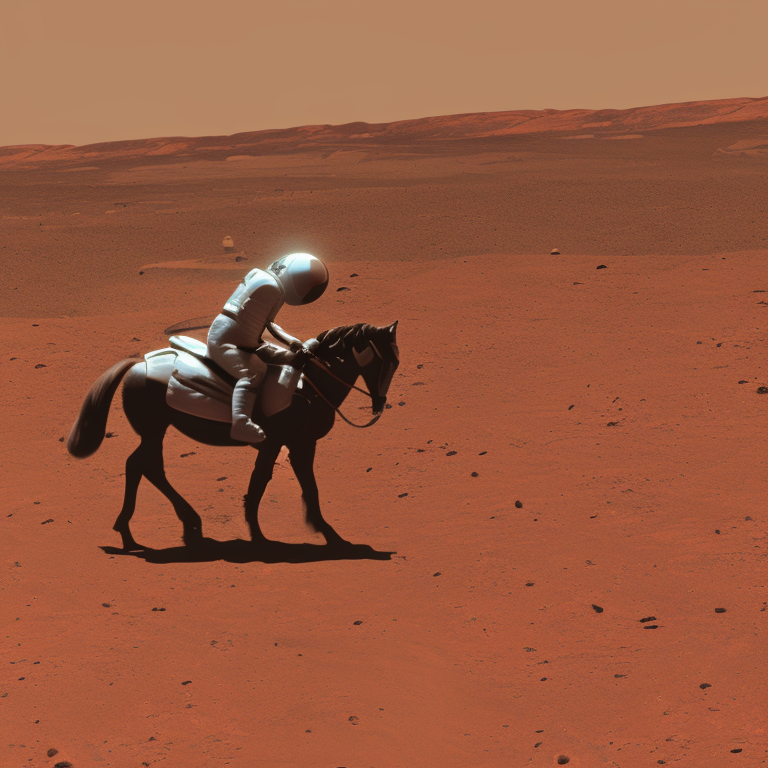

In [5]:
import torch
from IPython.display import display, Image as IPImage
import sys

from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)  # Use float32 to avoid black images
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")  
prompt = "a photo of an astronaut riding a horse on mars"

with torch.no_grad():  
    image = pipe(prompt, num_inference_steps=50).images[0]  

image.save("astronaut_rides_horse.png")
display(IPImage("astronaut_rides_horse.png"))


In [ ]:
##Integrating recorded speech along with image generation
import whisper
import torch
from IPython.display import display, Image as IPImage
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
whisper_model = whisper.load_model("base")
audio_file_path = r"C:\Users\sarve\Downloads\Recording1.mp3"
result = whisper_model.transcribe(audio_file_path)
prompt = result["text"]
print("Transcribed Prompt:", prompt)
model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
with torch.no_grad():
    image = pipe(prompt, num_inference_steps=50).images[0]
image.save("generated_image.png")
display(IPImage("generated_image.png"))



In [1]:
#Integrating in real-time speech along with image generation with sdm
import sounddevice as sd
import numpy as np
import queue
import threading
import torch
import whisper  
import time
from IPython.display import display, Image as IPImage
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

whisper_model = whisper.load_model("base")
audio_queue = queue.Queue()

def record_audio(duration=5, sample_rate=16000):
    print("Recording...")
    audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
    sd.wait()  
    audio_queue.put(audio.flatten())  
    print("Recording finished.")

def transcribe_and_generate_image():
    while True:
        if not audio_queue.empty():
            audio_data = audio_queue.get()
            audio_tensor = torch.from_numpy(audio_data).float()
            audio_tensor = audio_tensor / torch.max(torch.abs(audio_tensor))
            result = whisper_model.transcribe(audio_tensor.numpy(), language='en')
            transcription = result['text']
            print("Transcription:")
            print(transcription)
            
            generate_image(transcription)

def generate_image(prompt):
    model_id = "stabilityai/stable-diffusion-2-1"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    image = pipe(prompt).images[0]
    image_path = f"{prompt.replace(' ', '_')}.png"
    image.save(image_path)
    display(IPImage(image_path))

transcription_thread = threading.Thread(target=transcribe_and_generate_image)
transcription_thread.daemon = True
transcription_thread.start()

def start_recording(total_duration=5, interval=5):
    start_time = time.time()
    try:
        while (time.time() - start_time) < total_duration:
            record_audio(duration=interval)
    except KeyboardInterrupt:
        print("Recording interrupted. Exiting...")

start_recording(total_duration=5, interval=5)


C:\Users\sarve\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisper\__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, m

Recording...
Recording finished.
Transcription:
 Oh man, eating an ice cream.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [3]:
pip install streamlit_jupyter



   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------- ----------------------------- 2.4/8.7 MB 12.2 MB/s eta 0:00:01
   --------------------- ------------------ 4.7/8.7 MB 11.9 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 11.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/658.1 kB ? eta -:--:--
   --------------------------------------- 658.1/658.1 kB 12.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ------- -------------------------------- 1.3/6.9 MB 8.4 MB/s eta 0:00:01
   --------------------- ------------------ 3.7/6.9 MB 10.4 MB/s eta 0:00:01
   ---------------------------------- ----- 6.0/6.9 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------- 6.9/6.9 MB 10.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -----------------------

Recording...
Recording finished.
Transcription:
 Aman eating and ice cream


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch C:\Users\sarve\.cache\huggingface\hub\models--CompVis--ldm-text2im-large-256\snapshots\30de525ca11a880baea4962827fb6cb0bb268955\unet: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\sarve\.cache\huggingface\hub\models--CompVis--ldm-text2im-large-256\snapshots\30de525ca11a880baea4962827fb6cb0bb268955\unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch C:\Users\sarve\.cache\huggingface\hub\models--CompVis--ldm-text2im-large-256\snapshots\30de525ca11a880baea4962827fb6cb0bb268955\vqvae: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\sarve\.cache\huggingface\hub\models--CompVis--ldm-text2im-large-256\snapshots\30de525ca11a880baea4962827fb6cb0bb268955\vqvae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
The config attributes {'timestep_values': None} were p

  0%|          | 0/50 [00:00<?, ?it/s]

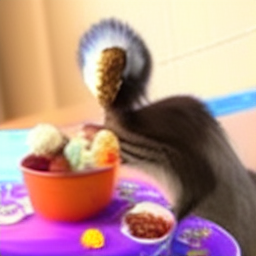

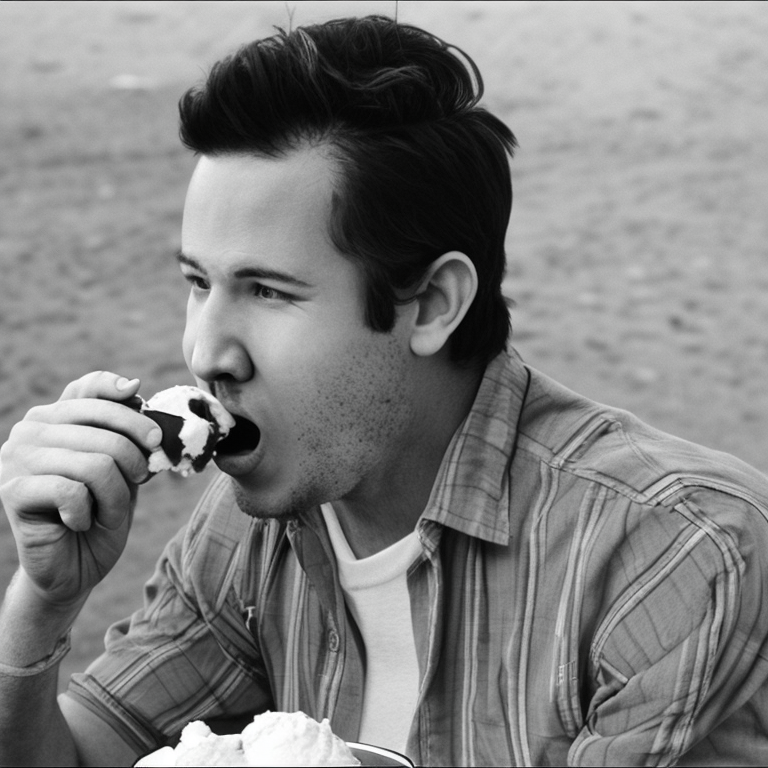

In [2]:
# Integrating real-time speech along with image generation with ldm 
import sounddevice as sd
import numpy as np
import queue
import threading
import torch
import whisper  
import time
from IPython.display import display, Image as IPImage
from diffusers import DiffusionPipeline

whisper_model = whisper.load_model("base")
audio_queue = queue.Queue()

def record_audio(duration=5, sample_rate=16000):
    print("Recording...")
    audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
    sd.wait()  
    audio_queue.put(audio.flatten())  
    print("Recording finished.")

def transcribe_and_generate_image():
    while True:
        if not audio_queue.empty():
            audio_data = audio_queue.get()
            audio_tensor = torch.from_numpy(audio_data).float()
            audio_tensor = audio_tensor / torch.max(torch.abs(audio_tensor))
            result = whisper_model.transcribe(audio_tensor.numpy(), language='en')
            transcription = result['text']
            print("Transcription:")
            print(transcription)
            
            generate_image(transcription)

def generate_image(prompt):
    ldm = DiffusionPipeline.from_pretrained("CompVis/ldm-text2im-large-256")

    images = ldm([prompt], num_inference_steps=50, eta=0.3, guidance_scale=7).images

    for idx, image in enumerate(images):
        image_path = f"{prompt.replace(' ', '_')}-{idx}.png"
        image.save(image_path)
        display(IPImage(image_path))

transcription_thread = threading.Thread(target=transcribe_and_generate_image)
transcription_thread.daemon = True
transcription_thread.start()

def start_recording(total_duration=5, interval=5):
    start_time = time.time()
    try:
        while (time.time() - start_time) < total_duration:
            record_audio(duration=interval)
    except KeyboardInterrupt:
        print("Recording interrupted. Exiting...")

start_recording(total_duration=5, interval=5)


In [1]:
!pip install ipywidgets sounddevice torch whisper diffusers
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [1]:
#UI using ipwidgets
import sounddevice as sd
import numpy as np
import queue
import threading
import torch
import whisper  
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from IPython.display import display, Image as IPImage, clear_output
import ipywidgets as widgets

whisper_model = whisper.load_model("base")
audio_queue = queue.Queue()
latest_transcription = ""  
def record_audio(duration=5, sample_rate=16000):
    print("Recording...")
    audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
    sd.wait()  
    audio_queue.put(audio.flatten())  
    print("Recording finished.")

def transcribe_and_generate_image():
    global latest_transcription 
    while True:
        if not audio_queue.empty():
            audio_data = audio_queue.get()
            audio_tensor = torch.from_numpy(audio_data).float()
            audio_tensor = audio_tensor / torch.max(torch.abs(audio_tensor))
            result = whisper_model.transcribe(audio_tensor.numpy(), language='en')
            latest_transcription = result['text'] 
            print("Transcription:")
            print(latest_transcription)

def generate_image(prompt):
    model_id = "stabilityai/stable-diffusion-2-1"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    image = pipe(prompt).images[0]
    image_path = f"{prompt.replace(' ', '_')}.png"
    image.save(image_path)
    return image_path

def display_image(image_path):
    clear_output(wait=True)
    display(IPImage(image_path))

def on_record_button_clicked(b):
    with output_area:
        record_audio(duration=5)

def on_transcribe_button_clicked(b):
    with output_area:
        transcription_thread = threading.Thread(target=transcribe_and_generate_image)
        transcription_thread.daemon = True
        transcription_thread.start()

def on_generate_image_button_clicked(b):
    if latest_transcription:
        with output_area:
            image_path = generate_image(latest_transcription)  
            display_image(image_path)
    else:
        print("No transcription available. Please record audio first.")

def on_clear_button_clicked(b):
    with output_area:
        clear_output(wait=True)

record_button = widgets.Button(description="Record Audio")
transcribe_button = widgets.Button(description="Transcribe Audio")
generate_image_button = widgets.Button(description="Generate Image")
clear_button = widgets.Button(description="Clear Output")
output_area = widgets.Output()

record_button.on_click(on_record_button_clicked)
transcribe_button.on_click(on_transcribe_button_clicked)
generate_image_button.on_click(on_generate_image_button_clicked)
clear_button.on_click(on_clear_button_clicked)

button_box = widgets.HBox([record_button, transcribe_button, generate_image_button, clear_button])
display(button_box, output_area)

C:\Users\sarve\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisper\__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, m

Output()

Recording...
Recording finished.
Transcription:
 Elephant eating unapple


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
#ui using streamlit
!pip install --upgrade transformers
from diffusers import StableDiffusionPipeline
!pip show diffusersimport streamlit as st
import sounddevice as sd
import numpy as np
import queue
import threading
import torch
import whisper  
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from PIL import Image
import time
import subprocess

whisper_model = whisper.load_model("base")
model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

audio_queue = queue.Queue()
if 'transcriptions' not in st.session_state:
    st.session_state.transcriptions = []
if 'cached_images' not in st.session_state:
    st.session_state.cached_images = {}

def record_audio(duration=5, sample_rate=16000):
    st.write("Recording...")
    audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
    sd.wait()  
    audio_queue.put(audio.flatten())  
    st.write("Recording finished.")

def transcribe_and_generate_image():
    while True:
        if not audio_queue.empty():
            audio_data = audio_queue.get()
            audio_tensor = torch.from_numpy(audio_data).float()
            audio_tensor /= torch.max(torch.abs(audio_tensor))
            result = whisper_model.transcribe(audio_tensor.numpy(), language='en')
            transcription = result['text']
            
            if transcription not in st.session_state.transcriptions:
                st.session_state.transcriptions.append(transcription)
                generate_image(transcription)

def generate_image(prompt):
    if prompt in st.session_state.cached_images:
        image_path = st.session_state.cached_images[prompt]
    else:
        image = pipe(prompt).images[0]
        image_path = f"{prompt.replace(' ', '_')}.png"
        image.save(image_path)
        
        st.session_state.cached_images[prompt] = image_path
    
    st.image(image_path, caption="Generated Image", use_column_width=True)

transcription_thread = threading.Thread(target=transcribe_and_generate_image)
transcription_thread.daemon = True
transcription_thread.start()

st.title("Real-Time Speech to Image Generator")

total_duration = st.slider("Total Recording Duration (seconds)", 5, 60, 5)
interval = st.slider("Recording Interval (seconds)", 1, 10, 5)

if st.button("Start Recording"):
    start_time = time.time()
    try:
        while (time.time() - start_time) < total_duration:
            record_audio(duration=interval)
    except KeyboardInterrupt:
        st.write("Recording interrupted. Exiting...")

if st.button("Show Transcription and Generate Image"):
    if st.session_state.transcriptions:
        latest_transcription = st.session_state.transcriptions[-1]
        st.write("Latest Transcription:")
        st.write(latest_transcription)
        generate_image(latest_transcription)
    else:
        st.write("No transcriptions available. Please record some audio first.")

streamlit_code = """
import streamlit as st
import sounddevice as sd
import numpy as np
import queue
import threading
import torch
import whisper  
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from PIL import Image

# Load models
whisper_model = whisper.load_model("base")
model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

# Initialize audio queue and session state
audio_queue = queue.Queue()
if 'transcriptions' not in st.session_state:
    st.session_state.transcriptions = []
if 'cached_images' not in st.session_state:
    st.session_state.cached_images = {}

# Function to record audio
def record_audio(duration=5, sample_rate=16000):
    st.write("Recording...")
    audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
    sd.wait()  
    audio_queue.put(audio.flatten())  
    st.write("Recording finished.")

# Function to transcribe audio and generate images
def transcribe_and_generate_image():
    while True:
        if not audio_queue.empty():
            audio_data = audio_queue.get()
            audio_tensor = torch.from_numpy(audio_data).float()
            audio_tensor /= torch.max(torch.abs(audio_tensor))
            result = whisper_model.transcribe(audio_tensor.numpy(), language='en')
            transcription = result['text']
            
            # Store transcription in session state
            if transcription not in st.session_state.transcriptions:
                st.session_state.transcriptions.append(transcription)
                generate_image(transcription)

# Function to generate images based on prompt
def generate_image(prompt):
    # Check if image is already cached
    if prompt in st.session_state.cached_images:
        image_path = st.session_state.cached_images[prompt]
    else:
        image = pipe(prompt).images[0]
        image_path = f"{prompt.replace(' ', '_')}.png"
        image.save(image_path)
        
        # Cache the generated image path
        st.session_state.cached_images[prompt] = image_path
    
    st.image(image_path, caption="Generated Image", use_column_width=True)

# Start transcription thread
transcription_thread = threading.Thread(target=transcribe_and_generate_image)
transcription_thread.daemon = True
transcription_thread.start()

# Streamlit UI setup
st.title("Real-Time Speech to Image Generator")

total_duration = st.slider("Total Recording Duration (seconds)", 5, 60, 5)
interval = st.slider("Recording Interval (seconds)", 1, 10, 5)

if st.button("Start Recording"):
    start_time = time.time()
    try:
        while (time.time() - start_time) < total_duration:
            record_audio(duration=interval)
    except KeyboardInterrupt:
        st.write("Recording interrupted. Exiting...")

if st.button("Show Transcription and Generate Image"):
    if st.session_state.transcriptions:
        latest_transcription = st.session_state.transcriptions[-1]
        st.write("Latest Transcription:")
        st.write(latest_transcription)
        generate_image(latest_transcription)
    else:
        st.write("No transcriptions available. Please record some audio first.")
"""

with open('app.py', 'w') as f:
    f.write(streamlit_code)

def run_streamlit():
    subprocess.Popen(["streamlit", "run", "app.py"])

run_streamlit()


In [5]:
#fine-tuning with latest dataset
import os
import pandas as pd
import torch
from torch.nn.utils.rnn import pad_sequence
from datasets import load_dataset, Audio
from transformers import WhisperProcessor, WhisperForConditionalGeneration, Seq2SeqTrainingArguments, Seq2SeqTrainer
csv_path = r'C:\Users\sarve\Downloads\Dataset\Recordings\audio__details.csv'
audio_folder_path = r'C:\Users\sarve\Downloads\Dataset\Recordings\Train'
df = pd.read_csv(csv_path)
df['file_name'] = df['file_name'].apply(lambda x: os.path.abspath(os.path.join(audio_folder_path, os.path.basename(x))))
df.to_csv(csv_path, index=False)
import sys
!{sys.executable} -m pip install datasets transformers librosa soundfile "transformers[torch]" "accelerate>=0.26.0"
dataset = load_dataset('csv', data_files=csv_path)
dataset = dataset.cast_column('file_name', Audio(sampling_rate=16000))
dataset = dataset.rename_column('file_name', 'audio')
dataset = dataset.rename_column('phrase', 'sentence')
processor = WhisperProcessor.from_pretrained("openai/whisper-base")
def prepare_dataset(batch):
    batch["input_features"] = processor(batch["audio"]["array"], sampling_rate=16000).input_features[0]
    batch["labels"] = processor.tokenizer(batch["sentence"]).input_ids
    return batch
dataset = dataset.map(prepare_dataset)
train_test_split = dataset['train'].train_test_split(test_size=0.1)
train_dataset = train_test_split['train']
eval_dataset = train_test_split['test']
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-base")
training_args = Seq2SeqTrainingArguments(
    output_dir="whisper-finetuned1",
    per_device_train_batch_size=8,
    gradient_accumulation_steps=4,
    learning_rate=1e-5,
    num_train_epochs=3,
    fp16=False,
    save_steps=100,
    logging_steps=10,
    evaluation_strategy="steps",
    eval_steps=100,
    save_total_limit=2,
)
class DataCollatorForWhisper:
    def __call__(self, features):
        input_features = [torch.tensor(feature["input_features"]) for feature in features]
        labels = [torch.tensor(feature["labels"]) for feature in features]
        input_features_padded = pad_sequence(input_features, batch_first=True, padding_value=0)
        labels_padded = pad_sequence(labels, batch_first=True, padding_value=-100)

        return {
            "input_features": input_features_padded,
            "labels": labels_padded
        }

data_collator = DataCollatorForWhisper()
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset, 
    tokenizer=processor.tokenizer,
    data_collator=data_collator,
)

trainer.train()
model.save_pretrained("whisper-finetuned1")
processor.save_pretrained("whisper-finetuned1")




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\sarve\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/108 [00:00<?, ? examples/s]

C:\Users\sarve\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\sarve\AppData\Local\Temp\ipykernel_1972\735086331.py:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Step,Training Loss,Validation Loss


C:\Users\sarve\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50358, 50359, 50360, 50361, 50362], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


[]

In [ ]:
#Fixed code for streamlit
#!/usr/bin/env python
# coding: utf-8

import sounddevice as sd
import scipy.io.wavfile as wav
import numpy as np
import librosa
import torch
from transformers import WhisperForConditionalGeneration, WhisperProcessor
from diffusers import StableDiffusionPipeline
print("Initializing models, please wait...")
model_path = r"C:\Users\sarve\whisper-finetuned1"
processor = WhisperProcessor.from_pretrained(model_path)
whisper_model = WhisperForConditionalGeneration.from_pretrained(model_path)

stable_diffusion_model = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
print("Models are loaded and ready.")

def record_audio(duration, fs=16000):
    print("Recording started...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype=np.int16)
    sd.wait() 
    print("Recording stopped.")
    return np.squeeze(audio)

def save_wav(filename, audio, fs=16000):
    wav.write(filename, fs, audio)

if __name__ == "__main__":
    duration = 5 
    audio = record_audio(duration)
    audio_filename = "mic_input.wav"
    save_wav(audio_filename, audio)
    
    audio_array, _ = librosa.load(audio_filename, sr=16000)  
    audio_input = processor(audio_array, return_tensors="pt", sampling_rate=16000)
    
    with torch.no_grad():
        generated_ids = whisper_model.generate(**audio_input)
    
    transcription = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    print(f"Transcription: {transcription}")
    
    print("Generating image...")
    image = stable_diffusion_model(transcription).images[0]
    
    image.save("output_image.png")
    print("Image saved as output_image.png")



Initializing models, please wait...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Models are loaded and ready.
Recording started...
Recording stopped.


Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Transcription:  1.5%
Generating image...


  0%|          | 0/50 [00:00<?, ?it/s]

In [1]:
#Using NLP for Sentimental Analysis 
#!/usr/bin/env python
# coding: utf-8
#!/usr/bin/env python
# coding: utf-8

import sounddevice as sd
import scipy.io.wavfile as wav
import numpy as np
import librosa
import torch
from transformers import WhisperForConditionalGeneration, WhisperProcessor
from diffusers import StableDiffusionPipeline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

print("Initializing models, please wait...")

model_path = r"C:\Users\sarve\whisper-finetuned1"
processor = WhisperProcessor.from_pretrained(model_path)
whisper_model = WhisperForConditionalGeneration.from_pretrained(model_path)

stable_diffusion_model = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
print("Models are loaded and ready.")

def record_audio(duration, fs=16000):
    print("Recording started...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype=np.int16)
    sd.wait() 
    print("Recording stopped.")
    return np.squeeze(audio)

def save_wav(filename, audio, fs=16000):
    wav.write(filename, fs, audio)

def analyze_sentiment(transcription):
    """Analyze sentiment using VADER and return sentiment scores."""
    sentiment_scores = sid.polarity_scores(transcription)
    print(f"Sentiment Scores: {sentiment_scores}")
    return sentiment_scores

def is_safe_transcription(transcription):
    """Check if transcription contains inappropriate content or negative sentiment."""
    sentiment_scores = analyze_sentiment(transcription)
    
    if sentiment_scores['compound'] < 0.02:
        return False
    
    inappropriate_keywords = ['sex', 'porn', 'nudity', 'violence']
    if any(keyword in transcription.lower() for keyword in inappropriate_keywords):
        return False  
    
    return True  

if __name__ == "__main__":
    duration = 10 
    audio = record_audio(duration)
    audio_filename = "mic_input.wav"
    save_wav(audio_filename, audio)
    
    audio_array, _ = librosa.load(audio_filename, sr=16000)  
    audio_input = processor(audio_array, return_tensors="pt", sampling_rate=16000)
    
    with torch.no_grad():
        generated_ids = whisper_model.generate(**audio_input)
    
    transcription = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    print(f"Transcription: {transcription}")
    
    if not is_safe_transcription(transcription):
        print("The transcription contains inappropriate content or negative sentiment. Image generation aborted.")
    else:
        print("Generating image...")
        image = stable_diffusion_model(transcription).images[0]
        
        image.save("output_image.png")
        print("Image saved as output_image.png")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sarve\AppData\Roaming\nltk_data...


Initializing models, please wait...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Models are loaded and ready.
Recording started...
Recording stopped.


Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Transcription:  I feel really sad today.
Sentiment Scores: {'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.5256}
The transcription contains inappropriate content or negative sentiment. Image generation aborted.


In [2]:
#!/usr/bin/env python
# coding: utf-8

import sounddevice as sd
import scipy.io.wavfile as wav
import numpy as np
import librosa
import torch
from transformers import WhisperForConditionalGeneration, WhisperProcessor
from diffusers import StableDiffusionPipeline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

print("Initializing models, please wait...")

model_path = r"C:\Users\sarve\whisper-finetuned1"
processor = WhisperProcessor.from_pretrained(model_path)
whisper_model = WhisperForConditionalGeneration.from_pretrained(model_path)

stable_diffusion_model = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
print("Models are loaded and ready.")

def record_audio(duration, fs=16000):
    print("Recording started...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype=np.int16)
    sd.wait() 
    print("Recording stopped.")
    return np.squeeze(audio)

def save_wav(filename, audio, fs=16000):
    wav.write(filename, fs, audio)

def analyze_sentiment(transcription):
    """Analyze sentiment using VADER and return sentiment scores."""
    sentiment_scores = sid.polarity_scores(transcription)
    print(f"Sentiment Scores: {sentiment_scores}")
    return sentiment_scores

def is_safe_transcription(transcription):
    """Check if transcription contains inappropriate content or negative sentiment."""
    sentiment_scores = analyze_sentiment(transcription)
    
    if sentiment_scores['compound'] < 0.02:
        return False
    
    inappropriate_keywords = ['sex', 'porn', 'nudity', 'violence']
    if any(keyword in transcription.lower() for keyword in inappropriate_keywords):
        return False  
    
    return True  

if __name__ == "__main__":
    duration = 10 
    audio = record_audio(duration)
    audio_filename = "mic_input.wav"
    save_wav(audio_filename, audio)
    
    audio_array, _ = librosa.load(audio_filename, sr=16000)  
    audio_input = processor(audio_array, return_tensors="pt", sampling_rate=16000)
    
    with torch.no_grad():
        generated_ids = whisper_model.generate(**audio_input)
    
    transcription = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    print(f"Transcription: {transcription}")
    
    if not is_safe_transcription(transcription):
        print("The transcription contains inappropriate content or negative sentiment. Image generation aborted.")
    else:
        print("Generating image...")
        image = stable_diffusion_model(transcription).images[0]
        
        image.save("output_image.png")
        print("Image saved as output_image.png")



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sarve\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Initializing models, please wait...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Models are loaded and ready.
Recording started...
Recording stopped.
Transcription:  An elephant walking
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Generating image...


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as output_image.png


In [4]:
#bert and valder nlp 
#!/usr/bin/env python
# coding: utf-8

import sounddevice as sd
import scipy.io.wavfile as wav
import numpy as np
import librosa
import torch
from transformers import WhisperForConditionalGeneration, WhisperProcessor, BartForConditionalGeneration, BartTokenizer
from diffusers import StableDiffusionPipeline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
print("Initializing models, please wait...")
model_path = r"C:\Users\sarve\whisper-finetuned1"
processor = WhisperProcessor.from_pretrained(model_path)
whisper_model = WhisperForConditionalGeneration.from_pretrained(model_path)
stable_diffusion_model = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
summarization_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
summarization_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

print("Models are loaded and ready.")

def record_audio(duration, fs=16000):
    print("Recording started...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype=np.int16)
    sd.wait() 
    print("Recording stopped.")
    return np.squeeze(audio)

def save_wav(filename, audio, fs=16000):
    wav.write(filename, fs, audio)

def analyze_sentiment(transcription):
    """Analyze sentiment using VADER and return sentiment scores."""
    sentiment_scores = sid.polarity_scores(transcription)
    print(f"Sentiment Scores: {sentiment_scores}")
    return sentiment_scores

def is_safe_transcription(transcription):
    """Check if transcription contains inappropriate content or negative sentiment."""
    sentiment_scores = analyze_sentiment(transcription)
    
    if sentiment_scores['compound'] < 0.02:
        return False
    
    inappropriate_keywords = ['sex', 'porn', 'nudity', 'violence']
    if any(keyword in transcription.lower() for keyword in inappropriate_keywords):
        return False  
    
    return True  

def summarize_text(text):
    """Summarize the input text using BART."""
    inputs = summarization_tokenizer.encode(text, return_tensors='pt', max_length=1024, truncation=True)
    
    with torch.no_grad():
        summary_ids = summarization_model.generate(inputs, max_length=150, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    
    summary = summarization_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    print(f"Summary: {summary}")
    return summary

if __name__ == "__main__":
    duration = 10 
    audio = record_audio(duration)
    audio_filename = "mic_input.wav"
    save_wav(audio_filename, audio)
    audio_array, _ = librosa.load(audio_filename, sr=16000)  
    audio_input = processor(audio_array, return_tensors="pt", sampling_rate=16000)
    with torch.no_grad():
        generated_ids = whisper_model.generate(**audio_input)
    transcription = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    print(f"Transcription: {transcription}")
    summarized_text = summarize_text(transcription)
    if not is_safe_transcription(summarized_text):
        print("The summarized transcription contains inappropriate content or negative sentiment. Image generation aborted.")
    else:
        print("Generating image...")
        image = stable_diffusion_model(summarized_text).images[0]
        
        image.save("output_image.png")
        print("Image saved as output_image.png")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sarve\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Initializing models, please wait...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Models are loaded and ready.
Recording started...
Recording stopped.
Transcription:  Aman is lying down on bed
Summary: CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery. Please submit your best shots of Aman for next week. Visit CNN.com/Travel next Wednesday for a new gallery of snapshots.
Sentiment Scores: {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.7579}
Generating image...


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as output_image.png


In [9]:
#Modifying Bert 
#!/usr/bin/env python
# coding: utf-8

import sounddevice as sd
import scipy.io.wavfile as wav
import numpy as np
import librosa
import torch
from transformers import WhisperForConditionalGeneration, WhisperProcessor, BartForConditionalGeneration, BartTokenizer
from diffusers import StableDiffusionPipeline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
print("Initializing models, please wait...")
model_path = r"C:\Users\sarve\whisper-finetuned1"
processor = WhisperProcessor.from_pretrained(model_path)
whisper_model = WhisperForConditionalGeneration.from_pretrained(model_path)
stable_diffusion_model = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
summarization_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
summarization_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

print("Models are loaded and ready.")

def record_audio(duration, fs=16000):
    print("Recording started...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype=np.int16)
    sd.wait() 
    print("Recording stopped.")
    return np.squeeze(audio)

def save_wav(filename, audio, fs=16000):
    wav.write(filename, fs, audio)

def analyze_sentiment(transcription):
    """Analyze sentiment using VADER and return sentiment scores."""
    sentiment_scores = sid.polarity_scores(transcription)
    print(f"Sentiment Scores: {sentiment_scores}")
    return sentiment_scores

def is_safe_transcription(transcription):
    """Check if transcription contains inappropriate content or negative sentiment."""
    sentiment_scores = analyze_sentiment(transcription)
    
    if sentiment_scores['compound'] < 0.02:
        return False
    
    inappropriate_keywords = ['sex', 'porn', 'nudity', 'violence']
    if any(keyword in transcription.lower() for keyword in inappropriate_keywords):
        return False  
    
    return True  

def summarize_text(text):
    """Summarize the input text using BART."""
    inputs = summarization_tokenizer.encode(text, return_tensors='pt', max_length=1024, truncation=True)
    
    with torch.no_grad():
        summary_ids = summarization_model.generate(inputs, max_length=100, min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True)
    
    summary = summarization_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    print(f"Summary: {summary}")
    return summary

if __name__ == "__main__":
    duration = 10 
    audio = record_audio(duration)
    audio_filename = "mic_input.wav"
    save_wav(audio_filename, audio)
    
    audio_array, _ = librosa.load(audio_filename, sr=16000)  
    audio_input = processor(audio_array, return_tensors="pt", sampling_rate=16000)
    
    with torch.no_grad():
        generated_ids = whisper_model.generate(**audio_input)
    
    transcription = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    print(f"Transcription: {transcription}")

    summarized_text = summarize_text(transcription)

    if not is_safe_transcription(summarized_text):
        print("The summarized transcription contains inappropriate content or negative sentiment. Image generation aborted.")
    else:
        print("Generating image...")
        image = stable_diffusion_model(summarized_text).images[0]
        
        image.save("output_image.png")
        print("Image saved as output_image.png")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sarve\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Initializing models, please wait...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Models are loaded and ready.
Recording started...
Recording stopped.
Transcription:  Amangki is sitting alone.
Summary: Amangki is sitting alone. Amangki has been left to his own devices. He is not alone.
Sentiment Scores: {'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'compound': -0.4588}
The summarized transcription contains inappropriate content or negative sentiment. Image generation aborted.


In [2]:
#t5 
#!/usr/bin/env python
# coding: utf-8

import sounddevice as sd
import scipy.io.wavfile as wav
import numpy as np
import librosa
import torch
from transformers import WhisperForConditionalGeneration, WhisperProcessor, T5ForConditionalGeneration, T5Tokenizer
from diffusers import StableDiffusionPipeline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

print("Initializing models, please wait...")
model_path = r"C:\Users\sarve\whisper-finetuned1"
processor = WhisperProcessor.from_pretrained(model_path)
whisper_model = WhisperForConditionalGeneration.from_pretrained(model_path)
stable_diffusion_model = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
summarization_model = T5ForConditionalGeneration.from_pretrained('t5-small')
summarization_tokenizer = T5Tokenizer.from_pretrained('t5-small')

print("Models are loaded and ready.")

def record_audio(duration, fs=16000):
    print("Recording started...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype=np.int16)
    sd.wait() 
    print("Recording stopped.")
    return np.squeeze(audio)

def save_wav(filename, audio, fs=16000):
    wav.write(filename, fs, audio)

def analyze_sentiment(transcription):
    """Analyze sentiment using VADER and return sentiment scores."""
    sentiment_scores = sid.polarity_scores(transcription)
    print(f"Sentiment Scores: {sentiment_scores}")
    return sentiment_scores

def is_safe_transcription(transcription):
    """Check if transcription contains inappropriate content or negative sentiment."""
    sentiment_scores = analyze_sentiment(transcription)
    
    if sentiment_scores['compound'] < 0:
        return False
    
    inappropriate_keywords = ['sex', 'porn', 'nudity', 'violence']
    if any(keyword in transcription.lower() for keyword in inappropriate_keywords):
        return False  
    
    return True  

def summarize_text(text):
    """Summarize the input text using T5."""
    input_text = "summarize: " + text
    inputs = summarization_tokenizer.encode(input_text, return_tensors='pt', max_length=512, truncation=True)
    
    with torch.no_grad():
        summary_ids = summarization_model.generate(inputs, max_length=150, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    
    summary = summarization_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    print(f"Summary: {summary}")
    return summary

if __name__ == "__main__":
    duration = 5
    audio = record_audio(duration)
    audio_filename = "mic_input.wav"
    save_wav(audio_filename, audio)
    
    audio_array, _ = librosa.load(audio_filename, sr=16000)  
    audio_input = processor(audio_array, return_tensors="pt", sampling_rate=16000)
    
    with torch.no_grad():
        generated_ids = whisper_model.generate(**audio_input)
    
    transcription = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    print(f"Transcription: {transcription}")
    summarized_text = summarize_text(transcription)

    if not is_safe_transcription(summarized_text):
        print("The summarized transcription contains inappropriate content or negative sentiment. Image generation aborted.")
    else:
        print("Generating image...")
        image = stable_diffusion_model(summarized_text).images[0]
        
        image.save("output_image.png")
        print("Image saved as output_image.png")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sarve\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Initializing models, please wait...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Models are loaded and ready.
Recording started...
Recording stopped.
Transcription:  Amanki is eating aapanana.
Summary: amanki is eating aapanana and eating aapanana. amanki is eating aapanana.
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Generating image...


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as output_image.png


In [1]:
#BART model with ui
#!/usr/bin/env python
# coding: utf-8

import streamlit as st
import sounddevice as sd
import scipy.io.wavfile as wav
import numpy as np
import librosa
import torch
from transformers import WhisperForConditionalGeneration, WhisperProcessor, BartForConditionalGeneration, BartTokenizer
from diffusers import StableDiffusionPipeline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
st.title("Speech to Image Generator")
st.write("Initializing models, please wait...")
model_path = r"C:\Users\sarve\whisper-finetuned1"
processor = WhisperProcessor.from_pretrained(model_path)
whisper_model = WhisperForConditionalGeneration.from_pretrained(model_path)
stable_diffusion_model = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
bart_model = BartForConditionalGeneration.from_pretrained("facebook/bart-large")
bart_tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")

st.write("Models are loaded and ready.")

def record_audio(duration, fs=16000):
    st.info("Recording started...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype=np.int16)
    sd.wait()
    st.success("Recording stopped.")
    return np.squeeze(audio)

def save_wav(filename, audio, fs=16000):
    wav.write(filename, fs, audio)

def analyze_sentiment(transcription):
    """Analyze sentiment using VADER and return sentiment scores."""
    sentiment_scores = sid.polarity_scores(transcription)
    return sentiment_scores

def is_safe_transcription(transcription):
    """Check if transcription contains inappropriate content or negative sentiment."""
    sentiment_scores = analyze_sentiment(transcription)
    if sentiment_scores['compound'] < 0.2:
        return False
    
    inappropriate_keywords = ['sex', 'porn', 'nudity', 'violence']
    if any(keyword in transcription.lower() for keyword in inappropriate_keywords):
        return False  
    
    return True  

def rephrase_text(text):
    """Rephrase the text to improve sentiment score using BART."""
    inputs = bart_tokenizer.encode(text, return_tensors='pt', max_length=1024, truncation=True)
    outputs = bart_model.generate(inputs, max_length=50, num_beams=5, early_stopping=True)
    rephrased_text = bart_tokenizer.decode(outputs[0], skip_special_tokens=True).strip()
    
    return rephrased_text

st.write("Click 'Record' to start recording your audio. After processing, the generated image will be displayed below.")
if st.button("Record"):
    duration = 5 
    audio = record_audio(duration)
    audio_filename = "mic_input.wav"
    save_wav(audio_filename, audio)
    audio_array, _ = librosa.load(audio_filename, sr=16000)  
    audio_input = processor(audio_array, return_tensors="pt", sampling_rate=16000)
    
    with torch.no_grad():
        generated_ids = whisper_model.generate(**audio_input)
    
    transcription = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    st.write(f"Transcription: {transcription}")
    if not is_safe_transcription(transcription):
        st.warning("The transcription contains inappropriate content or negative sentiment. Attempting to rephrase...")
        rephrased_transcription = rephrase_text(transcription)
        st.write(f"Rephrased Transcription: {rephrased_transcription}")
        if not is_safe_transcription(rephrased_transcription):
            st.warning("The rephrased transcription still contains inappropriate content or negative sentiment. Image generation aborted.")
        else:
            with st.spinner("Generating image..."):
                image = stable_diffusion_model(rephrased_transcription).images[0]
            
            st.image(image, caption="Generated Image", use_column_width=True)
            image.save("output_image.png")
    
    else:
        with st.spinner("Generating image..."):
            image = stable_diffusion_model(transcription).images[0]
        
        st.image(image, caption="Generated Image", use_column_width=True)
        image.save("output_image.png")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sarve\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
2024-11-15 19:06:20.838 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-15 19:06:21.542 
  command:

    streamlit run C:\Users\sarve\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-15 19:06:21.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-15 19:06:21.544 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-15 19:06:21.545 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-15 19:06:21.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored wh

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

C:\Users\sarve\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sarve\.cache\huggingface\hub\models--facebook--bart-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

2024-11-15 19:08:11.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-15 19:08:11.634 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-15 19:08:11.639 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-15 19:08:11.640 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-15 19:08:11.646 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-15 19:08:11.647 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-15 19:08:11.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-15 19:08:11.649 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar